Name of Dataset: Ultra-Processed Food Dataset
Description: Data is taken every 5 minutes for 3 hrs per day for 80 days
X1: production flow; X2-X14: sensor measurements across 4 distinct phases; X15-X16: external (uncontrolled) influences on final quality; X17: categorical label denoting final product quality

Use Cases: Classification(Determine class from X17); Regression(Target=X17); Unsupervised Learning

A. Loading the Dataset and Extracting a single data point

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('DatasetUF.csv')
print("\nShape of the data:", df.shape)
sample_row = df.sample(n=1)
sample_row_T = sample_row.T
sample_row_T.columns = ['Value']
print("\nSingle Datapoint Sample(Transposed):\n")
print(sample_row_T.to_string())


Shape of the data: (23132, 18)

Single Datapoint Sample(Transposed):

                        Value
DateTime  2021-02-05 05:25:00
X1                   0.585585
X2                  -0.445162
X3                  -0.196428
X4                  -0.363836
X5                   0.333333
X6                  -0.418051
X7                  -1.480382
X8                   1.161287
X9                   1.138104
X10                  0.379876
X11                  1.495123
X12                 -0.661422
X13                  1.743212
X14                 -1.064088
X15                 -0.303572
X16                  0.232315
X17                 -0.014755


B. Plotting the Data

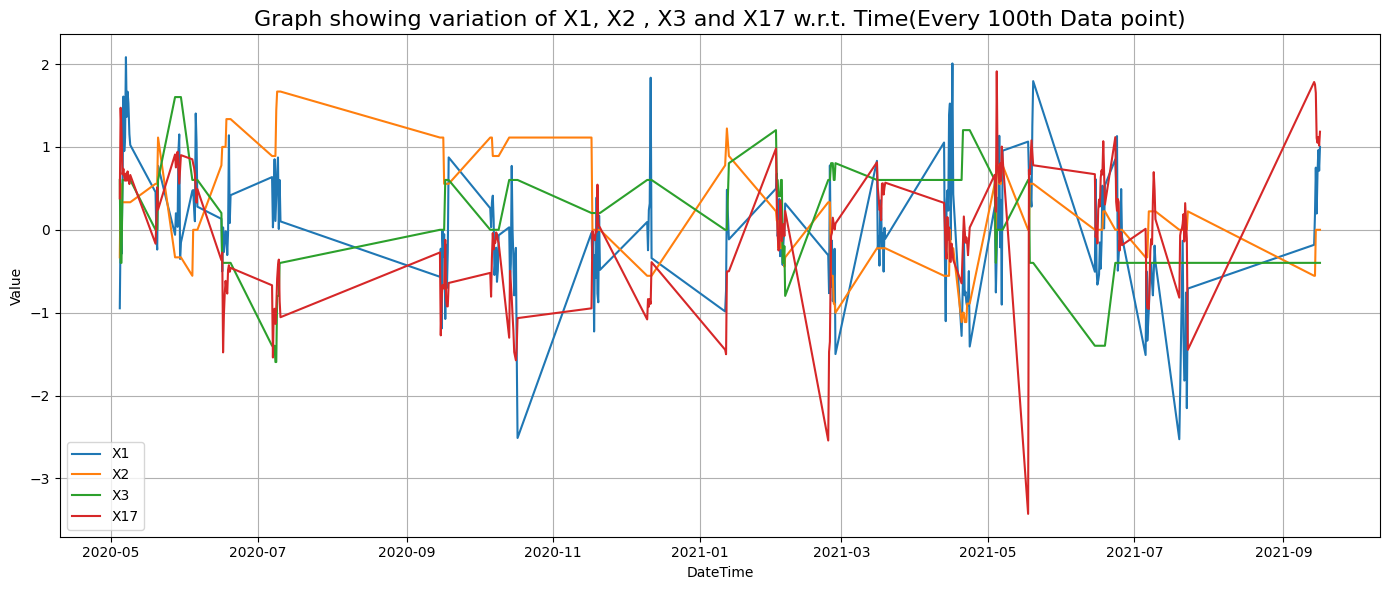

In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df_sampled = df.iloc[::100, :]
df_sampled.set_index('DateTime', inplace=True)

features_to_plot = ['X1', 'X2', 'X3', 'X17']

plt.figure(figsize=(14, 6))
for feature in features_to_plot:
    plt.plot(df_sampled.index, df_sampled[feature], label=feature)

plt.title('Graph showing variation of X1, X2 , X3 and X17 w.r.t. Time(Every 100th Data point)', fontsize=16)
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C. Using a Model from Scikit learn


Mean Squared Error (MSE): 0.12684319145998832
R-squared Score (R²): 0.7536914335794789


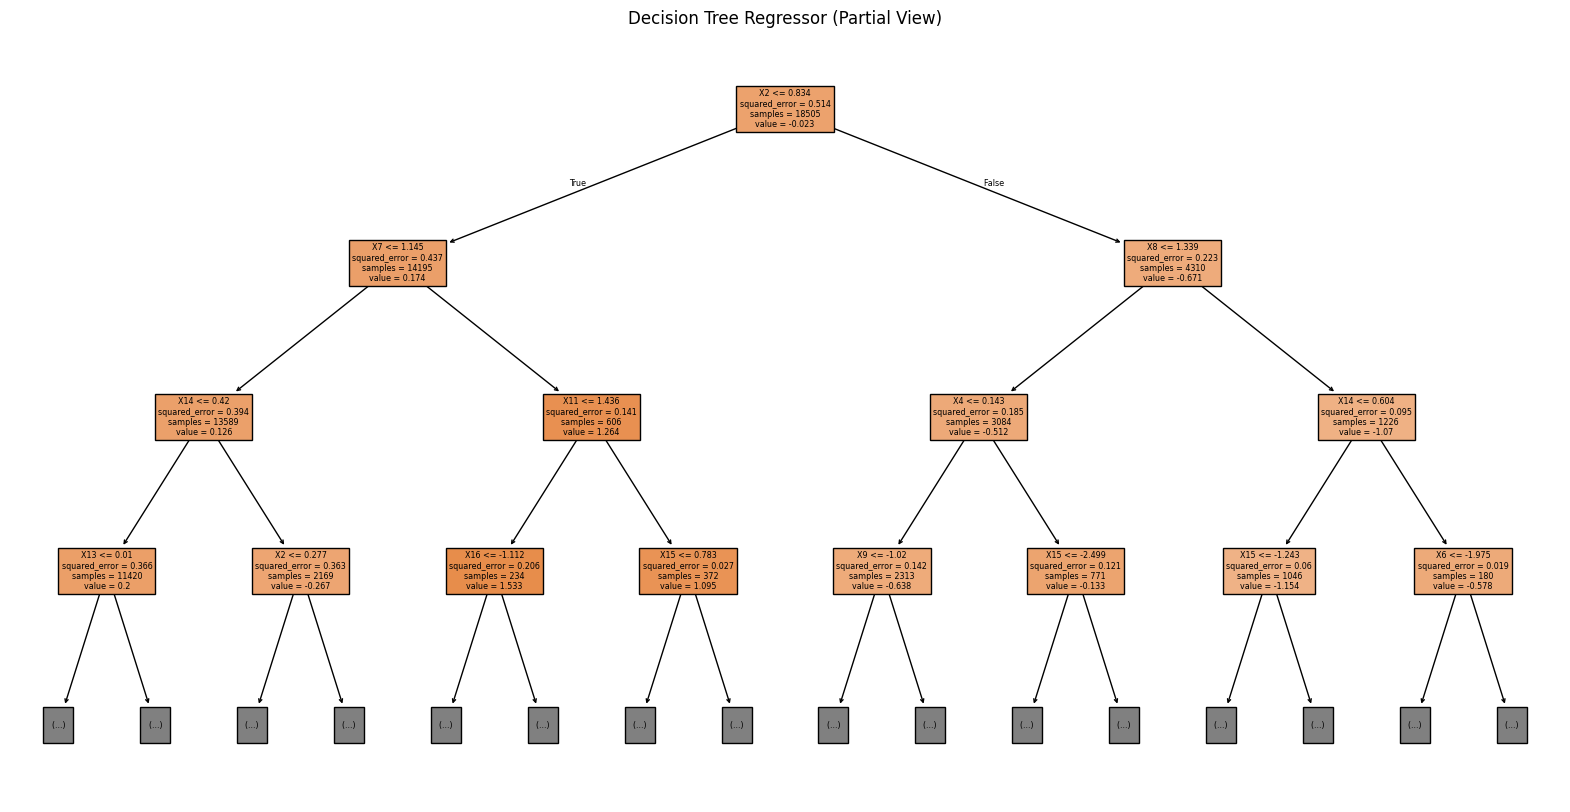

In [4]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']]
y = df['X17']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)

plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree Regressor (Partial View)")
plt.show()